# Green Screen Problem

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Forground Image Shape : (906, 1710, 3)
Background Image Shape : (1080, 1920, 3)


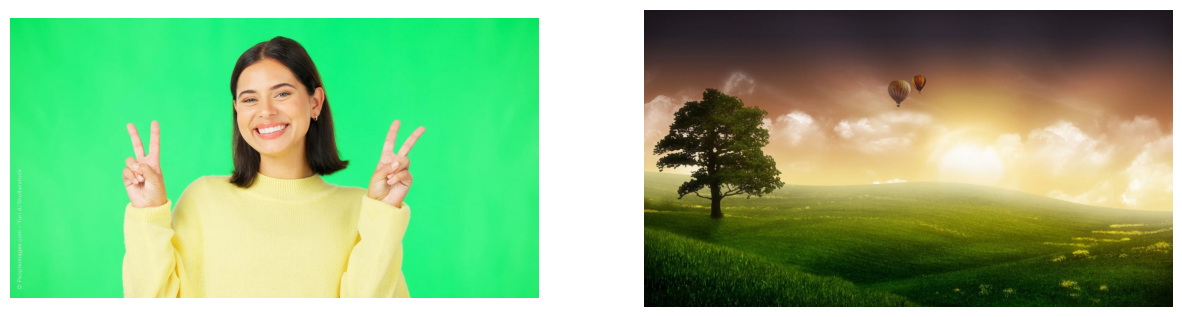

In [67]:
fgimage = cv.imread(r"D:\Git\Image-Processing\Images\green_screen_girl.jpg")
bgimage = cv.imread(r"D:\Git\Image-Processing\Images\background_for_green_screen.jpg")
fgimage_rgb = cv.cvtColor(fgimage, cv.COLOR_BGR2RGB)
bgimage_rgb = cv.cvtColor(bgimage, cv.COLOR_BGR2RGB)
print("Forground Image Shape :", fgimage.shape)
print("Background Image Shape :", bgimage.shape)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(fgimage_rgb)
ax[0].axis("off")
ax[1].imshow(bgimage_rgb)
ax[1].axis("off")
plt.show()

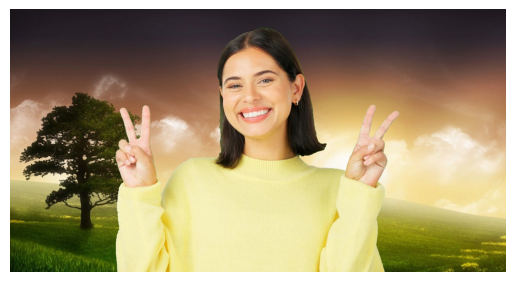

In [68]:
y1, x1 = fgimage_rgb.shape[:-1]
y2, x2 = bgimage_rgb.shape[:-1]
new_image = fgimage_rgb.copy()
for i in range(x1):
    for j in range(y1):
        if (fgimage_rgb[j, i][1] > fgimage_rgb[j, i][0] + 20 and fgimage_rgb[j, i][1] > fgimage_rgb[j, i][2] + 20):
            fgimage_rgb[j, i] = bgimage_rgb[j, i]
plt.imshow(fgimage_rgb)
plt.axis("off")
plt.show()

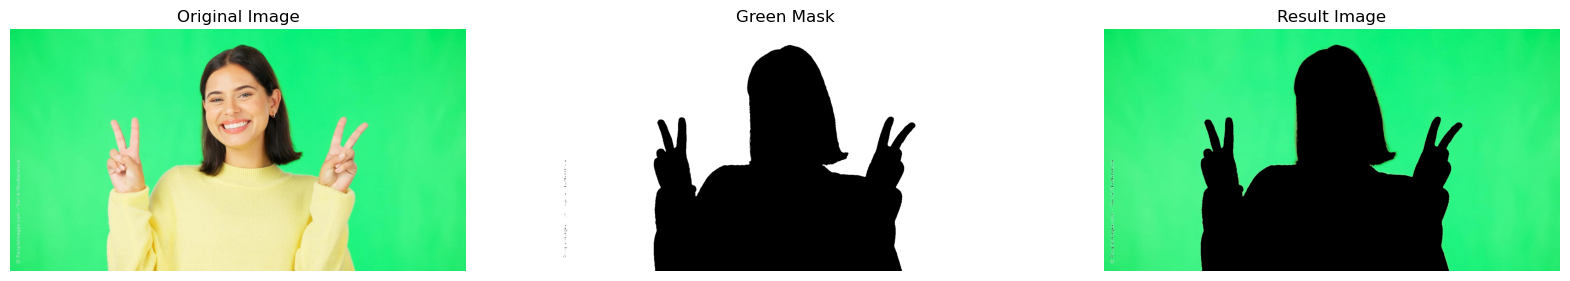

In [69]:
# Convert the image from BGR to HSV
hsv_image = cv.cvtColor(fgimage, cv.COLOR_BGR2HSV)

# Define the range for green color in HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Create a mask for green color
green_mask = cv.inRange(hsv_image, lower_green, upper_green)

# Apply the mask to the original image (optional)
result = cv.bitwise_and(fgimage, fgimage, mask=green_mask)

# Display the original image, mask, and result using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(cv.cvtColor(fgimage, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(green_mask, cmap='gray')
ax[1].set_title('Green Mask')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
ax[2].set_title('Result Image')
ax[2].axis('off')
plt.show()